In [1]:
import matplotlib.pyplot as plt

In [44]:
import numpy as np

In [1]:
import cv2
import torch

from depth_anything_v2.dpt import DepthAnythingV2

DEVICE = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}

encoder = 'vits' # or 'vits', 'vitb', 'vitg'

model = DepthAnythingV2(**model_configs[encoder])
model.load_state_dict(torch.load(f'depth_anything_v2_{encoder}.pth', map_location='cpu'))
model = model.to(DEVICE).eval()



xFormers not available
xFormers not available
C:\Users\Diptanshu\AppData\Local\Temp\ipykernel_26008\969930793.py:18: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load

In [145]:
top_x = 400
bottom_x = 600
y = 0

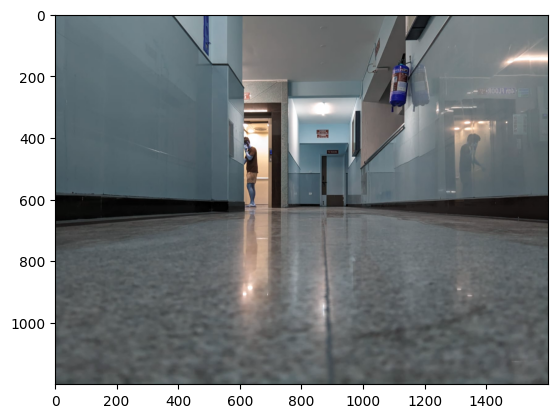

In [142]:
plt.imshow(imag)

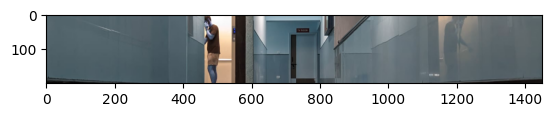

In [143]:
imag = cv2.imread('A.jpg')
plt.imshow(imag[top_x:bottom_x, y:])
cropped_image = imag[top_x:bottom_x, y:]

In [105]:
depth  = model.infer_image(cropped_image)

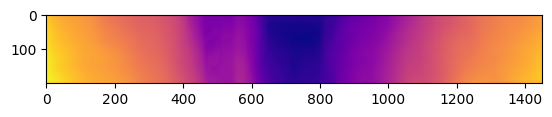

In [42]:
plt.imshow(depth, cmap='plasma')

In [ ]:
np.array(depth).shape

(200, 1450)

In [55]:
nor_roi = np.array(depth).astype(np.float64).sum(axis=0)/200

In [80]:
nor_roi.argmax()

np.int64(0)

In [82]:
inversion = (-1 * nor_roi) + np.max(nor_roi)

In [88]:
vec_safest = np.array([inversion.argmax() , inversion.max()])

In [91]:
vec_safest

array([730.        ,   7.67890693])

In [ ]:
current_vec = np.array([len(inversion)//2 , 0])

In [94]:
current_vec

array([725,   0])

In [ ]:
destination = np.array([ 300, inversion[300]])

In [97]:
destination

array([300.        ,   2.70080375])

In [99]:
destination_vec = destination - current_vec
safest_vec = vec_safest - current_vec

In [100]:
destination_vec

array([-425.        ,    2.70080375])

In [102]:
safest_vec

array([5.        , 7.67890693])

In [ ]:
trajec = (safest_vec + destination_vec)/2

In [115]:
trajec

array([-210.        ,    5.18985534])

In [121]:
ou = trajec[0] + len(inversion)//2

In [126]:
out = np.array([trajec[0], inversion[int(ou)]])

In [127]:
out

array([-210.        ,    5.43280591])

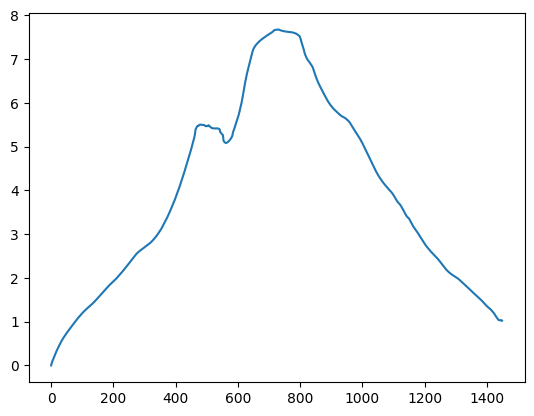

In [83]:
plt.plot(inversion)
plt.plot(nor_roi.argmax())

In [135]:
import numpy as np

def calculate_fov(sensor_size, focal_length):
    """
    Calculate the field of view (in degrees) given the sensor size (mm) and focal length (mm).
    """
    # Calculate half FOV in radians
    half_fov = np.arctan(sensor_size / (2 * focal_length))
    # Multiply by 2 and convert to degrees
    fov = 2 * half_fov * (180.0 / np.pi)
    return fov

# Example parameters:
sensor_width = 36  # in mm
sensor_height = 24  # in mm
focal_length = 50  # in mm

horizontal_fov = calculate_fov(sensor_width, focal_length)
vertical_fov = calculate_fov(sensor_height, focal_length)

print("Horizontal FOV:", horizontal_fov, "degrees")
print("Vertical FOV:", vertical_fov, "degrees")


Horizontal FOV: 39.597752709049864 degrees
Vertical FOV: 26.991466561591622 degrees


In [136]:
angle_per_column = horizontal_fov / len(inversion)
steering_angle = angle_per_column * (out[0])

In [137]:
steering_angle

np.float64(-5.73484694406929)

In [109]:
inversion[trajec[0]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [70]:
np.argmin(nor_roi)

np.int64(730)

In [61]:
nor_roi.argmax()

np.int64(0)

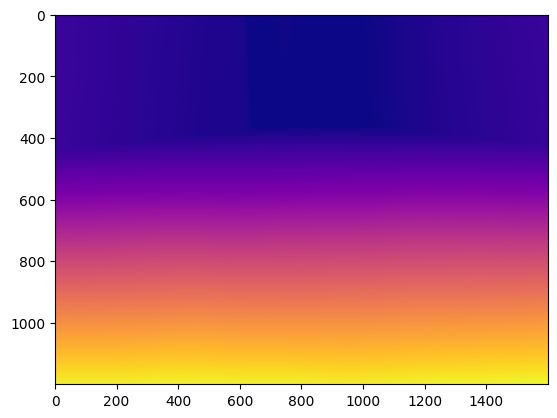

In [ ]:

plt.imshow(depth, cmap='plasma')